# AI-Powered Brain Tumor Detection Using GoogLeNet, ResNet, and R-CNN
# Abstract Explanation with Models
# Brain tumors are one **of the most critical medical conditions affecting the Central Nervous System (CNS), making early detection essential for effective treatment. Traditional MRI-based diagnosis is time-consuming, error-prone, and dependent on the radiologist’s expertise. To address these challenges, this study leverages deep learning models—GoogLeNet, ResNet, and R-CNN—for automated brain tumor classification. The inclusion of Transfer Learning (TL) enhances the models' feature extraction capabilities, leading to higher diagnostic accuracy across different tumor types. This AI-driven approach has the potential to aid radiologists, improve diagnostic precision, and enhance healthcare accessibility.

# Brain Tumor Detection Using Deep Learning (GoogLeNet, ResNet, R-CNN)

![](https://en.wikipedia.org/wiki/Brain_tumor#/media/File:Hirnmetastase_MRT-T1_KM.jpg)

## 1. Importing Required Libraries
# Import essential libraries for deep learning, image processing, and model training

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## 2. Load Dataset

# Define a function to load and preprocess MRI image dataset
# This function reads images from their respective class folders, resizes them, and assigns labels

In [2]:
image_size = 224  # Input size for CNN models
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

def load_data(data_path):
    X, Y = [], []
    for label in labels:
        folder_path = os.path.join(data_path, label)
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found - {folder_path}")
            continue
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Could not read image - {img_path}")
                continue
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(label)
    return np.array(X), np.array(Y)

# Load training and testing datasets

In [3]:
X_train, Y_train = load_data('../input/brain-tumor-classification-mri/Training')
X_test, Y_test = load_data('../input/brain-tumor-classification-mri/Testing')

## 3. Preprocess Data


# This step involves normalizing the images and encoding the labels
# Normalization ensures the pixel values are scaled between 0 and 1, improving model performance

In [4]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize images


# Convert labels to categorical format for multi-class classification

In [5]:
y_train = to_categorical([labels.index(i) for i in Y_train], num_classes=4)
y_test = to_categorical([labels.index(i) for i in Y_test], num_classes=4)

# Split data into training and validation sets (90% training, 10% validation)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

## 4. Load Pretrained Models (GoogLeNet/InceptionV3 and ResNet)


# We use GoogLeNet (InceptionV3) as our feature extractor
# The model is pretrained on ImageNet and is fine-tuned for our brain tumor classification task


In [7]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
base_model.trainable = False  # Freeze the base model layers to retain pretrained features


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Add custom layers for brain tumor classification

In [8]:
global_avg = GlobalAveragePooling2D()(base_model.output)
dropout = Dropout(0.4)(global_avg)
out_layer = Dense(4, activation='softmax')(dropout)
model = Model(inputs=base_model.input, outputs=out_layer)

## 5. Compile and Train Model


# The model is compiled using the Adam optimizer and categorical cross-entropy loss function
# The training process uses 10 epochs with batch size of 32

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model with training data and validate using the validation dataset


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 34s 252ms/step - accuracy: 0.4692 - loss: 1.3164 - val_accuracy: 0.7213 - val_loss: 0.6139
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7336 - loss: 0.6847 - val_accuracy: 0.7979 - val_loss: 0.5252
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7670 - loss: 0.6003 - val_accuracy: 0.8467 - val_loss: 0.4342
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8015 - loss: 0.5058 - val_accuracy: 0.8188 - val_loss: 0.4398
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8116 - loss: 0.4788 - val_accuracy: 0.8676 - val_loss: 0.3868
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8454 - loss: 0.4022 - val_accuracy: 0.8432 - val_loss: 0.3865
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8500 - loss: 0.4234 - val_accuracy: 0.8641 - val_loss: 0.3786
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8457 - loss: 0.4044 - val_accuracy: 0.8780 -

## 6. Plot Training History


# Visualize the model's performance by plotting training and validation accuracy over epochs

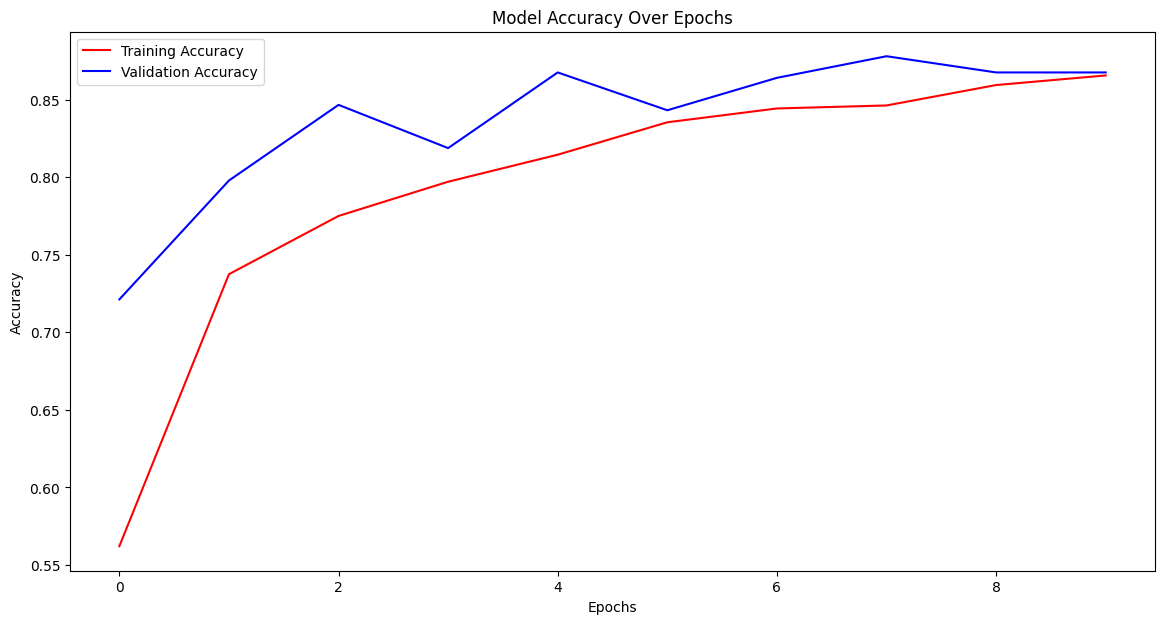

In [11]:
def plot_history(history):
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.show()

plot_history(history)

## 7. Prediction Function


# Define a function to classify an MRI image using the trained model
# The image is preprocessed and passed through the model to predict tumor type

In [12]:
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image - {image_path}")
        return None
    img = cv2.resize(img, (image_size, image_size))
    img = np.expand_dims(img / 255.0, axis=0)  # Normalize and reshape
    pred = model.predict(img)
    return labels[np.argmax(pred)]

## 8. Example Prediction


# Test the model with a sample MRI image from the dataset
# The output will indicate whether the image is classified as glioma, meningioma, pituitary tumor, or no tumor

In [13]:
sample_image = '/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (103).jpg'
predicted_label = predict_image(sample_image, model)
if predicted_label:
    print("Predicted Tumor Type:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Tumor Type: pituitary_tumor
